In [3]:
import os
import json
import spotipy
import pandas as pd
import spotipy.util as util
import matplotlib.pyplot as plt
from json.decoder import JSONDecodeError



In [4]:
# Set up spotipy wrapper library with client id and client secret credentials. 

In [5]:
# Setup Stopipy account with token access 
username = 'ryan_hoffman-us' 
scope = 'user-read-private user-read-playback-state user-modify-playback-state' #Borrowed from iamsumat's code
client_id = '25e72c8800394165a1af4116a118836f'
client_secret = 'b3286ac633c841c4b676ce46e73c2434' 

# retrieve access token
token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri='https://www.google.com/')

sp = spotipy.Spotify(auth=token)


In [6]:
# Creates a list of countries where Spotify is available. 

# Online we found a dictionary that mapped country names to country codes. 
# We then swapped the keys and values to make a new dictionary to map country codes to countries since the Spotify API 
# provided a list of country codes where Spotify was available. But we needed to convert those codes
# to country names so we can later find the top 50 playlist for each country. 

In [7]:
# Dictionary mapping country name to country code
country_to_abbrev = {
    "Andorra": "AD",
    "United Arab Emirates": "AE",
    "Afghanistan": "AF",
    "Antigua and Barbuda": "AG",
    "Anguilla": "AI",
    "Albania": "AL",
    "Armenia": "AM",
    "Angola": "AO",
    "Antarctica": "AQ",
    "Argentina": "AR",
    "American Samoa": "AS",
    "Austria": "AT",
    "Australia": "AU",
    "Aruba": "AW",
    "Åland Islands": "AX",
    "Azerbaijan": "AZ",
    "Bosnia and Herzegovina": "BA",
    "Barbados": "BB",
    "Bangladesh": "BD",
    "Belgium": "BE",
    "Burkina Faso": "BF",
    "Bulgaria": "BG",
    "Bahrain": "BH",
    "Burundi": "BI",
    "Benin": "BJ",
    "Saint Barthélemy": "BL",
    "Bermuda": "BM",
    "Brunei Darussalam": "BN",
    "Bolivia (Plurinational State of)": "BO",
    "Bonaire, Sint Eustatius and Saba": "BQ",
    "Brazil": "BR",
    "Bahamas": "BS",
    "Bhutan": "BT",
    "Bouvet Island": "BV",
    "Botswana": "BW",
    "Belarus": "BY",
    "Belize": "BZ",
    "Canada": "CA",
    "Cocos (Keeling) Islands": "CC",
    "Congo, Democratic Republic of the": "CD",
    "Central African Republic": "CF",
    "Congo": "CG",
    "Switzerland": "CH",
    "Côte d'Ivoire": "CI",
    "Cook Islands": "CK",
    "Chile": "CL",
    "Cameroon": "CM",
    "China": "CN",
    "Colombia": "CO",
    "Costa Rica": "CR",
    "Cuba": "CU",
    "Cabo Verde": "CV",
    "Curaçao": "CW",
    "Christmas Island": "CX",
    "Cyprus": "CY",
    "Czechia": "CZ",
    "Germany": "DE",
    "Djibouti": "DJ",
    "Denmark": "DK",
    "Dominica": "DM",
    "Dominican Republic": "DO",
    "Algeria": "DZ",
    "Ecuador": "EC",
    "Estonia": "EE",
    "Egypt": "EG",
    "Western Sahara": "EH",
    "Eritrea": "ER",
    "Spain": "ES",
    "Ethiopia": "ET",
    "Finland": "FI",
    "Fiji": "FJ",
    "Falkland Islands (Malvinas)": "FK",
    "Micronesia (Federated States of)": "FM",
    "Faroe Islands": "FO",
    "France": "FR",
    "Gabon": "GA",
    "United Kingdom": "GB",
    "Grenada": "GD",
    "Georgia": "GE",
    "French Guiana": "GF",
    "Guernsey": "GG",
    "Ghana": "GH",
    "Gibraltar": "GI",
    "Greenland": "GL",
    "Gambia": "GM",
    "Guinea": "GN",
    "Guadeloupe": "GP",
    "Equatorial Guinea": "GQ",
    "Greece": "GR",
    "South Georgia and the South Sandwich Islands": "GS",
    "Guatemala": "GT",
    "Guam": "GU",
    "Guinea-Bissau": "GW",
    "Guyana": "GY",
    "Hong Kong": "HK",
    "Heard Island and McDonald Islands": "HM",
    "Honduras": "HN",
    "Croatia": "HR",
    "Haiti": "HT",
    "Hungary": "HU",
    "Indonesia": "ID",
    "Ireland": "IE",
    "Israel": "IL",
    "Isle of Man": "IM",
    "India": "IN",
    "British Indian Ocean Territory": "IO",
    "Iraq": "IQ",
    "Iran (Islamic Republic of)": "IR",
    "Iceland": "IS",
    "Italy": "IT",
    "Jersey": "JE",
    "Jamaica": "JM",
    "Jordan": "JO",
    "Japan": "JP",
    "Kenya": "KE",
    "Kyrgyzstan": "KG",
    "Cambodia": "KH",
    "Kiribati": "KI",
    "Comoros": "KM",
    "Saint Kitts and Nevis": "KN",
    "Korea (Democratic People's Republic of)": "KP",
    "Korea, Republic of": "KR",
    "Kuwait": "KW",
    "Cayman Islands": "KY",
    "Kazakhstan": "KZ",
    "Lao People's Democratic Republic": "LA",
    "Lebanon": "LB",
    "Saint Lucia": "LC",
    "Liechtenstein": "LI",
    "Sri Lanka": "LK",
    "Liberia": "LR",
    "Lesotho": "LS",
    "Lithuania": "LT",
    "Luxembourg": "LU",
    "Latvia": "LV",
    "Libya": "LY",
    "Morocco": "MA",
    "Monaco": "MC",
    "Moldova, Republic of": "MD",
    "Montenegro": "ME",
    "Saint Martin (French part)": "MF",
    "Madagascar": "MG",
    "Marshall Islands": "MH",
    "North Macedonia": "MK",
    "Mali": "ML",
    "Myanmar": "MM",
    "Mongolia": "MN",
    "Macao": "MO",
    "Northern Mariana Islands": "MP",
    "Martinique": "MQ",
    "Mauritania": "MR",
    "Montserrat": "MS",
    "Malta": "MT",
    "Mauritius": "MU",
    "Maldives": "MV",
    "Malawi": "MW",
    "Mexico": "MX",
    "Malaysia": "MY",
    "Mozambique": "MZ",
    "Namibia": "NA",
    "New Caledonia": "NC",
    "Niger": "NE",
    "Norfolk Island": "NF",
    "Nigeria": "NG",
    "Nicaragua": "NI",
    "Netherlands": "NL",
    "Norway": "NO",
    "Nepal": "NP",
    "Nauru": "NR",
    "Niue": "NU",
    "New Zealand": "NZ",
    "Oman": "OM",
    "Panama": "PA",
    "Peru": "PE",
    "French Polynesia": "PF",
    "Papua New Guinea": "PG",
    "Philippines": "PH",
    "Pakistan": "PK",
    "Poland": "PL",
    "Saint Pierre and Miquelon": "PM",
    "Pitcairn": "PN",
    "Puerto Rico": "PR",
    "Palestine, State of": "PS",
    "Portugal": "PT",
    "Palau": "PW",
    "Paraguay": "PY",
    "Qatar": "QA",
    "Réunion": "RE",
    "Romania": "RO",
    "Serbia": "RS",
    "Russian Federation": "RU",
    "Rwanda": "RW",
    "Saudi Arabia": "SA",
    "Solomon Islands": "SB",
    "Seychelles": "SC",
    "Sudan": "SD",
    "Sweden": "SE",
    "Singapore": "SG",
    "Slovenia": "SI",
    "Svalbard and Jan Mayen": "SJ",
    "Slovakia": "SK",
    "Sierra Leone": "SL",
    "San Marino": "SM",
    "Senegal": "SN",
    "Somalia": "SO",
    "Suriname": "SR",
    "South Sudan": "SS",
    "Sao Tome and Principe": "ST",
    "El Salvador": "SV",
    "Sint Maarten (Dutch part)": "SX",
    "Syrian Arab Republic": "SY",
    "Eswatini": "SZ",
    "Turks and Caicos Islands": "TC",
    "Chad": "TD",
    "French Southern Territories": "TF",
    "Togo": "TG",
    "Thailand": "TH",
    "Tajikistan": "TJ",
    "Tokelau": "TK",
    "Timor-Leste": "TL",
    "Turkmenistan": "TM",
    "Tunisia": "TN",
    "Tonga": "TO",
    "Turkey": "TR",
    "Trinidad and Tobago": "TT",
    "Tuvalu": "TV",
    "Taiwan, Province of China": "TW",
    "Tanzania, United Republic of": "TZ",
    "Ukraine": "UA",
    "Uganda": "UG",
    "United States Minor Outlying Islands": "UM",
    "United States of America": "US",
    "Uruguay": "UY",
    "Uzbekistan": "UZ",
    "Holy See": "VA",
    "Saint Vincent and the Grenadines": "VC",
    "Venezuela (Bolivarian Republic of)": "VE",
    "Virgin Islands (British)": "VG",
    "Virgin Islands (U.S.)": "VI",
    "Viet Nam": "VN",
    "Vanuatu": "VU",
    "Wallis and Futuna": "WF",
    "Samoa": "WS",
    "Yemen": "YE",
    "Kosovo": "XK",
    "Mayotte": "YT",
    "South Africa": "ZA",
    "Zambia": "ZM",
    "Zimbabwe": "ZW",
}

abbrev_to_country = {}

# Swap keys and values to make a new dictionary mapping country codes to country names which is what we need. 
for key, value in country_to_abbrev.items():
    abbrev_to_country[value] = key

# List of country codes where Spotify is available according to their API. 
country_codes = ["AD", "AE", "AG", "AL", "AM", "AO", "AR", "AT", "AU", "AZ", "BA", "BB", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BN", "BO", "BR", "BS", "BT", "BW", "BY", "BZ", "CA", "CD", "CG", "CH", "CI", "CL", "CM", "CO", "CR", "CV", "CW", "CY", "CZ", "DE", "DJ", "DK", "DM", "DO", "DZ", "EC", "EE", "EG", "ES", "ET", "FI", "FJ", "FM", "FR", "GA", "GB", "GD", "GE", "GH", "GM", "GN", "GQ", "GR", "GT", "GW", "GY", "HK", "HN", "HR", "HT", "HU", "ID", "IE", "IL", "IN", "IQ", "IS", "IT", "JM", "JO", "JP", "KE", "KG", "KH", "KI", "KM", "KN", "KR", "KW", "KZ", "LA", "LB", "LC", "LI", "LK", "LR", "LS", "LT", "LU", "LV", "LY", "MA", "MC", "MD", "ME", "MG", "MH", "MK", "ML", "MN", "MO", "MR", "MT", "MU", "MV", "MW", "MX", "MY", "MZ", "NA", "NE", "NG", "NI", "NL", "NO", "NP", "NR", "NZ", "OM", "PA", "PE", "PG", "PH", "PK", "PL", "PR", "PS", "PT", "PW", "PY", "QA", "RO", "RS", "RW", "SA", "SB", "SC", "SE", "SG", "SI", "SK", "SL", "SM", "SN", "SR", "ST", "SV", "SZ", "TD", "TG", "TH", "TJ", "TL", "TN", "TO", "TR", "TT", "TV", "TW", "TZ", "UA", "UG", "US", "UY", "UZ", "VC", "VE", "VN", "VU", "WS", "XK", "ZA", "ZM", "ZW"]

# Create list of country names where Spotify is available.
countries = []
for code in country_codes:
    countries.append(abbrev_to_country[code])
    
countries

['Andorra',
 'United Arab Emirates',
 'Antigua and Barbuda',
 'Albania',
 'Armenia',
 'Angola',
 'Argentina',
 'Austria',
 'Australia',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Brunei Darussalam',
 'Bolivia (Plurinational State of)',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Congo, Democratic Republic of the',
 'Congo',
 'Switzerland',
 "Côte d'Ivoire",
 'Chile',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Cabo Verde',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Micronesia (Federated States of)',
 'France',
 'Gabon',
 'United Kingdom',
 'Grenada',
 'Georgia',
 'Ghana',
 'Gambia',
 'Guinea',
 'Equatorial Guinea',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Hong Kong',
 'Hondura

In [8]:
# Display Top 50 playlists per country

def search_playlist(result, query): # returns the playlist id from the result of the search method 
    try:
        # Make sure the name of the playlist is the same one that we searched for and that it is made by Spotify (and not
        # a user). Make both sides lowercase to make the comparison case-insenstive. 
        if(str.lower(result['playlists']['items'][0]['name']) == str.lower(query) and
           result['playlists']['items'][0]['owner']['id'] == 'spotify'):
            playlist_id = result['playlists']['items'][0]['id']
            return playlist_id
        else:
            print('No playlist found for: ' + query)
    # While some countries do not return a playlist, it appears one or two return a playlist but that 
    # has no data in it, so we have to catch the IndexError this situation causes. 
    except IndexError as e:
        print(e)

# Had to hard code the list of countries that was outputted as a result of the prior cell because a lot of countries
# had extraneous words in them e.g. "republic of ..."
countries = ['Andorra',
 'United Arab Emirates',
 'Antigua and Barbuda',
 'Albania',
 'Armenia',
 'Angola',
 'Argentina',
 'Austria',
 'Australia',
 'Azerbaijan',
 'Bosnia and Herzegovina',
 'Barbados',
 'Bangladesh',
 'Belgium',
 'Burkina Faso',
 'Bulgaria',
 'Bahrain',
 'Burundi',
 'Benin',
 'Brunei Darussalam',
 'Bolivia',
 'Brazil',
 'Bahamas',
 'Bhutan',
 'Botswana',
 'Belarus',
 'Belize',
 'Canada',
 'Congo',
 'Congo',
 'Switzerland',
 "Côte d'Ivoire",
 'Chile',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Cabo Verde',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Denmark',
 'Dominica',
 'Dominican Republic',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Egypt',
 'Spain',
 'Ethiopia',
 'Finland',
 'Fiji',
 'Micronesia',
 'France',
 'Gabon',
 'United Kingdom',
 'Grenada',
 'Georgia',
 'Ghana',
 'Gambia',
 'Guinea',
 'Equatorial Guinea',
 'Greece',
 'Guatemala',
 'Guinea-Bissau',
 'Guyana',
 'Hong Kong',
 'Honduras',
 'Croatia',
 'Haiti',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iceland',
 'Italy',
 'Jamaica',
 'Jordan',
 'Japan',
 'Kenya',
 'Kyrgyzstan',
 'Cambodia',
 'Kiribati',
 'Comoros',
 'Saint Kitts and Nevis',
 'Korea, Republic of',
 'Kuwait',
 'Kazakhstan',
 "Lao People's Democratic Republic",
 'Lebanon',
 'Saint Lucia',
 'Liechtenstein',
 'Sri Lanka',
 'Liberia',
 'Lesotho',
 'Lithuania',
 'Luxembourg',
 'Latvia',
 'Libya',
 'Morocco',
 'Monaco',
 'Moldova',
 'Montenegro',
 'Madagascar',
 'Marshall Islands',
 'North Macedonia',
 'Mali',
 'Mongolia',
 'Macao',
 'Mauritania',
 'Malta',
 'Mauritius',
 'Maldives',
 'Malawi',
 'Mexico',
 'Malaysia',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Nicaragua',
 'Netherlands',
 'Norway',
 'Nepal',
 'Nauru',
 'New Zealand',
 'Oman',
 'Panama',
 'Peru',
 'Papua New Guinea',
 'Philippines',
 'Pakistan',
 'Poland',
 'Puerto Rico',
 'Palestine',
 'Portugal',
 'Palau',
 'Paraguay',
 'Qatar',
 'Romania',
 'Serbia',
 'Rwanda',
 'Saudi Arabia',
 'Solomon Islands',
 'Seychelles',
 'Sweden',
 'Singapore',
 'Slovenia',
 'Slovakia',
 'Sierra Leone',
 'San Marino',
 'Senegal',
 'Suriname',
 'Sao Tome and Principe',
 'El Salvador',
 'Eswatini',
 'Chad',
 'Togo',
 'Thailand',
 'Tajikistan',
 'Timor-Leste',
 'Tunisia',
 'Tonga',
 'Turkey',
 'Trinidad and Tobago',
 'Tuvalu',
 'Taiwan',
 'Tanzaniaf',
 'Ukraine',
 'Uganda',
 'United States of America',
 'Uruguay',
 'Uzbekistan',
 'Saint Vincent and the Grenadines',
 'Venezuela',
 'Viet Nam',
 'Vanuatu',
 'Samoa',
 'Kosovo',
 'South Africa',
 'Zambia',
 'Zimbabwe']

playlist_name = 'Top 50 - ' # + country

# Pull the 'Top 50 - <country name>' playlists for the countries in the list then create a dataframe and corresponding
# CSV for the playlist for each country. 
for country in countries:
    # Search Spotify for the playlist (e.g. Top 50 - United States)
    search_result = sp.search(playlist_name + country, type='playlist', limit=1)
    # Pass the search results to the search_playlist function to get back a playlist ID which is required to 
    # get the list of tracks in the playlist. 
    playlist_id = search_playlist(search_result, playlist_name + country)
    # Only continue if the playlist ID search returned data. 
    if playlist_id is not None:
        # Create list of tracks from the playlist to save into a CSV.
        playlist_tracks = sp.playlist_tracks(playlist_id, additional_types=('track'))
        track_ids = []
        track_names = []
        for track_obj in playlist_tracks['items']:
            # Get the track ids from the playlist and put it in a list      
            # Use the ids to search songs and their features/analysis and then put that data in csv files by country
            track_ids.append(track_obj['track']['id'])
            track_names.append(track_obj['track']['name'])
        # export dataframe to csv before the first for loop moves to next country
        track_information_df = pd.DataFrame(sp.audio_features(track_ids))
        track_information_df.insert(0, 'name', track_names, False)
        track_information_df.to_csv('resources/' + country + '.csv', sep=',', index=False, encoding='utf-8')
        print(f'Finished converting {country}\'s Top 50 Playlist to csv')

No playlist found for: Top 50 - Andorra
No playlist found for: Top 50 - United Arab Emirates
No playlist found for: Top 50 - Antigua and Barbuda
No playlist found for: Top 50 - Albania
No playlist found for: Top 50 - Armenia
No playlist found for: Top 50 - Angola
Finished converting Argentina's Top 50 Playlist to csv
Finished converting Austria's Top 50 Playlist to csv
Finished converting Australia's Top 50 Playlist to csv
No playlist found for: Top 50 - Azerbaijan
No playlist found for: Top 50 - Bosnia and Herzegovina
No playlist found for: Top 50 - Barbados
No playlist found for: Top 50 - Bangladesh
Finished converting Belgium's Top 50 Playlist to csv
No playlist found for: Top 50 - Burkina Faso
Finished converting Bulgaria's Top 50 Playlist to csv
No playlist found for: Top 50 - Bahrain
No playlist found for: Top 50 - Burundi
No playlist found for: Top 50 - Benin
No playlist found for: Top 50 - Brunei Darussalam
Finished converting Bolivia's Top 50 Playlist to csv
Finished convertin

In [9]:
# Combine CSVs and calculate averages for audio features by country.

In [10]:
# Use the Argentina.csv playlist as a sample to create a list of columns that are numerical (floats or ints) since 
# statistical anaylsis can only be done on numerical data. This list of columns is then used to both calculate 
# averages and then to be listed as the keys of the master dataframe that will combine the averages of every 
# column for every country.
dict_combined = {"Country": []}
list_columns = []
df_current = pd.read_csv('resources/Argentina.csv')
for column, dtype in df_current.dtypes.items():
    if dtype in ['float64', 'int64']:
        # Add the word "average" to the beginning of each column. 
        dict_combined[f'average_{column}'] = []
        list_columns.append(column)

# Iterate through every CSV created in the prior cell to calcualte the average of each column (i.e. audio feature) for 
# each CSV then add it to a master dictionary of all the averages that will later be converted into a dataframe.
for file in os.listdir('resources'): # Lists every file in the directory. 
    # Remove file extension to use the name as the country for the dataframe at the end. 
    country = file.removesuffix('.csv')
    dict_combined["Country"].append(country)
    # Concatenate the name of the file with the name of the folder it is inside of (e.g. 'resources/Argentina.csv'). 
    df_current = pd.read_csv('resources/'+file) 
    for column in list_columns:
        curr_avg = df_current[column].mean()
        dict_combined[f'average_{column}'].append(curr_avg)
        
# Convert the dictionary created above into a dataframe.
df_combined = pd.DataFrame.from_dict(dict_combined)

# Set the country as the index to make it easier to later find the minumum and maximum values/countries.
df_combined.set_index('Country', inplace=True)
print("Global_Mean:\n", df_combined.mean(),"\n\n", sep='')

Global_Mean:
average_danceability             0.685989
average_energy                   0.650388
average_key                      5.478857
average_loudness                -6.297747
average_mode                     0.527429
average_speechiness              0.103157
average_acousticness             0.255547
average_instrumentalness         0.015491
average_liveness                 0.174627
average_valence                  0.519637
average_tempo                  123.501871
average_duration_ms         193305.458571
average_time_signature           3.892857
dtype: float64




In [11]:
regional_columns = []
df_current = pd.read_csv('resources/Argentina.csv')
for column, dtype in df_current.dtypes.items():
    if dtype in ['float64', 'int64']:
        # Add the word "average" to the beginning of each column. 
        regional_columns.append(f'average_{column}')

regional_columns.insert(0, 'Country')

In [12]:
#group by countries by continent

df_combined.head()

eastern_european_countries = ['Belarus', 'Bulgaria', 'Estonia', 'Greece', 'Hungary', 'Lithuania', 'Poland', 'Romania', 'Slovakia', 'Ukraine']
western_european_countries = ['Austria', 'Belgium', 'France', 'Germany', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Spain', 'Switzerland',]
northern_european_countries = ['Denmark', 'Finland', 'Iceland', 'Ireland', 'Latvia', 'Norway', 'Sweden']
african_countries = ['Morocco', 'Nigeria', 'South Africa']
east_asian_countries = ['Hong Kong', 'Japan', 'South Korea', 'Taiwan']
southeast_asian_countries = ['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
middle_eastern_countries = ['Egypt', 'Israel', 'Saudi Arabia', 'Turkey']
south_asian_countries = ['India', 'Pakistan', 'Kazakhstan']
latin_american_countries =['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Costa Rica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Guatemala',
                           'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Uruguay', 'Venezuela']
english_speaking_countries = ['Australia', 'New Zealand', 'USA', 'United Kingdom']

world_regions = [eastern_european_countries, western_european_countries, northern_european_countries, african_countries, east_asian_countries,
                 southeast_asian_countries, south_asian_countries, middle_eastern_countries, latin_american_countries, english_speaking_countries]

eastern_european_df = pd.DataFrame(columns=regional_columns)
western_european_df = pd.DataFrame(columns=regional_columns)
northern_european_df = pd.DataFrame(columns=regional_columns)
african_df = pd.DataFrame(columns=regional_columns)
east_asian_df = pd.DataFrame(columns=regional_columns)
southeast_asian_df = pd.DataFrame(columns=regional_columns)
south_asian_df = pd.DataFrame(columns=regional_columns)
middle_eastern_df = pd.DataFrame(columns=regional_columns)
latin_american_df = pd.DataFrame(columns=regional_columns)
english_speaking_df = pd.DataFrame(columns=regional_columns)

world_regions_dfs = [eastern_european_df, western_european_df, northern_european_df, african_df, east_asian_df, southeast_asian_df, south_asian_df,
                    middle_eastern_df, latin_american_df, english_speaking_df]


In [13]:
#iterate through
duplicate_df = df_combined
duplicate_df = duplicate_df.reset_index()

eu_mask = duplicate_df['Country'].isin(eastern_european_countries)
eastern_european_df = duplicate_df[eu_mask]

wu_mask = duplicate_df['Country'].isin(western_european_countries)
western_european_df = duplicate_df[wu_mask]

ne_mask = duplicate_df['Country'].isin(northern_european_countries)
northern_european_df = duplicate_df[ne_mask]

a_mask = duplicate_df['Country'].isin(african_countries)
african_df = duplicate_df[a_mask]

ea_mask = duplicate_df['Country'].isin(east_asian_countries)
east_asian_df = duplicate_df[ea_mask]

sea_mask = duplicate_df['Country'].isin(southeast_asian_countries)
southeast_asian_df = duplicate_df[sea_mask]

me_mask = duplicate_df['Country'].isin(middle_eastern_countries)
middle_eastern_df = duplicate_df[me_mask]

sa_mask = duplicate_df['Country'].isin(south_asian_countries)
south_asian_df = duplicate_df[sa_mask]

la_mask = duplicate_df['Country'].isin(latin_american_countries)
latin_american_df = duplicate_df[la_mask]

es_mask = duplicate_df['Country'].isin(english_speaking_countries)
english_speaking_df = duplicate_df[es_mask]

western_european_df.head()

,Country,average_danceability,average_energy,average_key,average_loudness,average_mode,average_speechiness,average_acousticness,average_instrumentalness,average_liveness,average_valence,average_tempo,average_duration_ms,average_time_signature
2,New Zealand,0.67384,0.62748,4.90,-6.69016,0.68,0.082360,0.219175,0.012608,0.177682,0.469458,129.98820,203974.20,3.88
24,United Kingdom,0.64418,0.62604,4.98,-6.15014,0.62,0.097000,0.205482,0.001793,0.207062,0.462434,124.82178,196651.36,3.88
47,USA,0.63756,0.60636,5.44,-6.97990,0.70,0.087388,0.271657,0.021736,0.169658,0.433760,126.82622,190351.54,3.84
49,Australia,0.66186,0.62160,5.00,-6.39152,0.66,0.077178,0.204315,0.004796,0.154900,0.457680,129.07154,202333.74,3.88


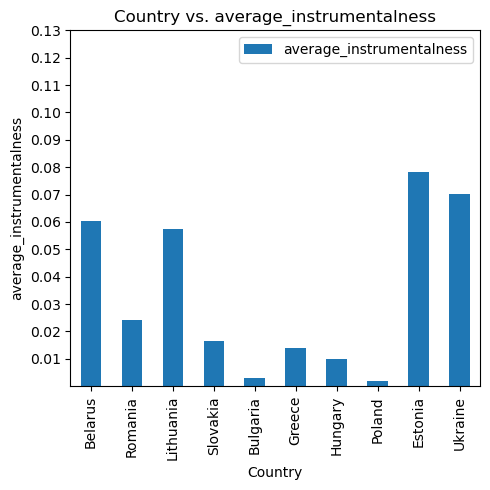

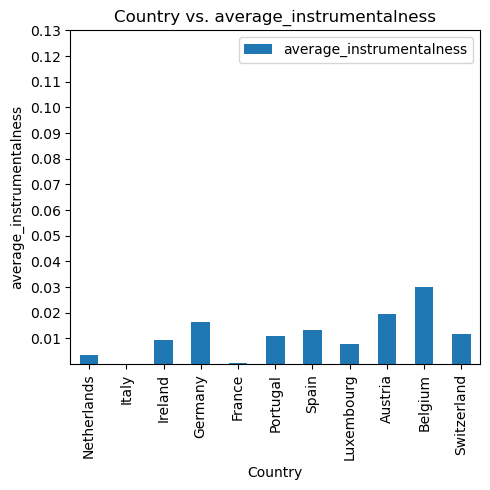

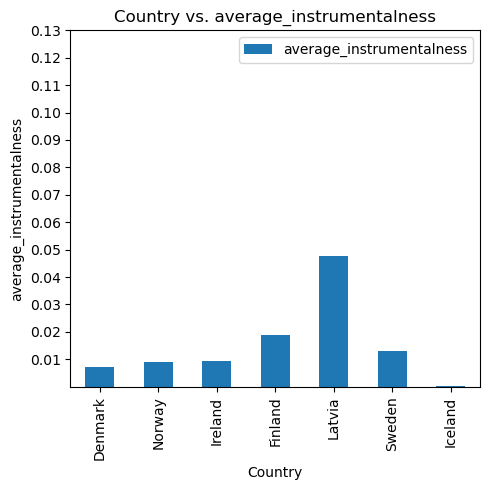

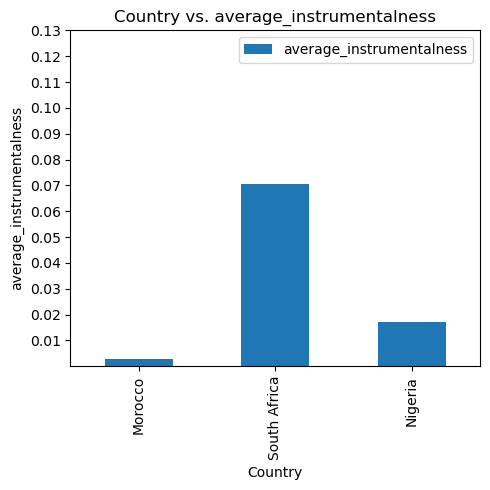

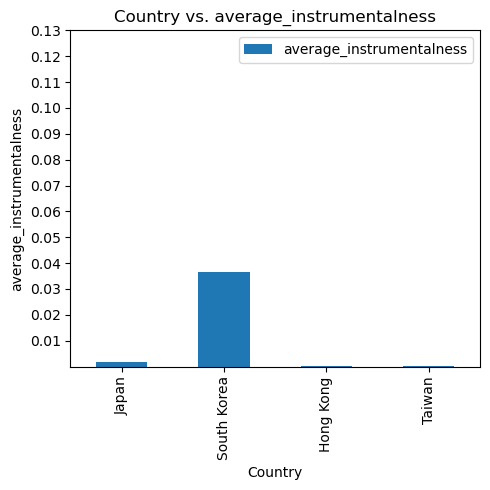

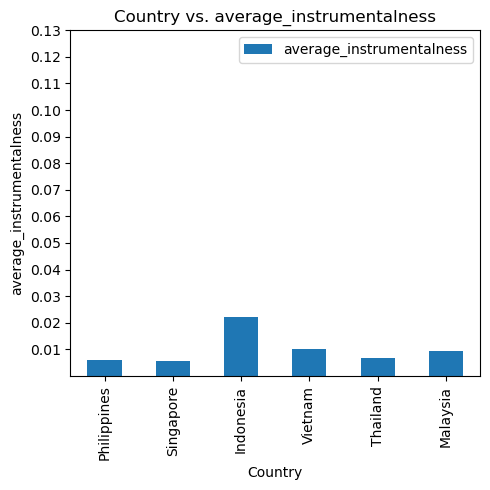

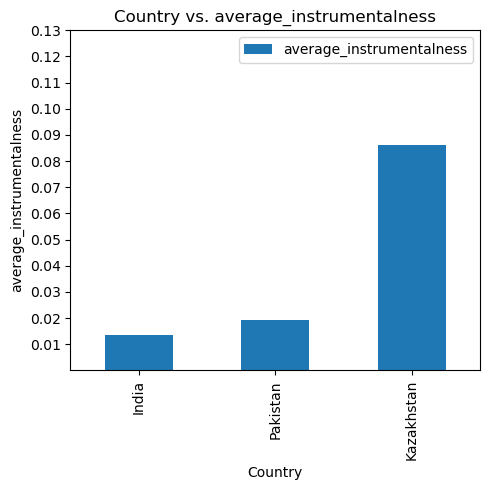

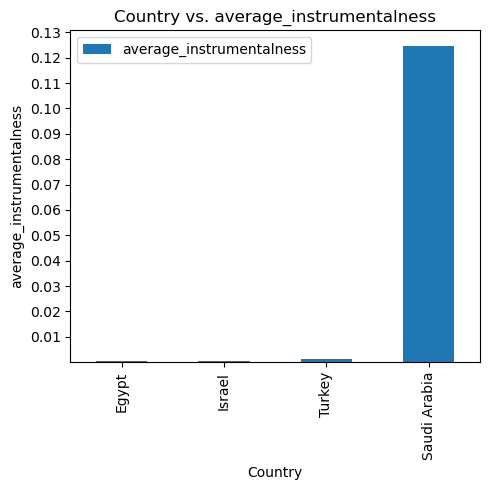

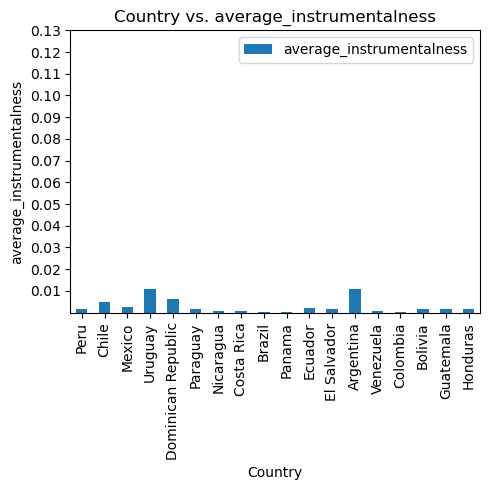

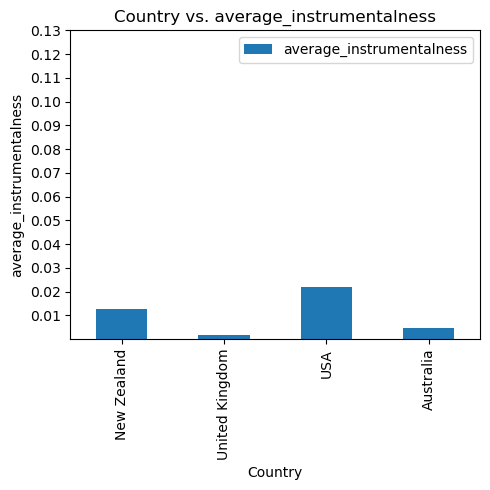

In [23]:
# graph each country on danceability
#world_regions_dfs[0]

world_regions_dfs = [eastern_european_df, western_european_df, northern_european_df, african_df, east_asian_df, southeast_asian_df, south_asian_df,
                    middle_eastern_df, latin_american_df, english_speaking_df]

for df in world_regions_dfs:
    df.plot.bar(x='Country', y='average_instrumentalness', figsize=(5,5))
    plt.xlabel('Country')
    #plt.ylabel('average_danceability')
    #plt.title("Country vs. average_danceability")
    plt.ylabel('average_instrumentalness')
    plt.title("Country vs. average_instrumentalness")
    plt.yticks([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]) #Instrumental
    #plt.yticks([0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.tight_layout()
    plt.show()


In [19]:
regional_averages_dict = {'region': [], 'average_danceability': [], 'average_energy': [], 'average_instrumentalness': [], 'average_key': [],
                          'average_liveness': [], 'average_loudness': [], 'average_mode': [], 'average_speechiness': [], 'average_tempo': [],
                          'average_acousticness': [], 'average_valence': [], 'average_duration_ms': [], 'average_time_signature': []}

regions = ['Eastern Europe', 'Western Europe', 'Northern Europe', 'Africa', 'East Asia', 'Southeast Asia', 'South Asia', 'Middle East', 'Latin America', 'English Speaking']

i = 0
for df in world_regions_dfs:
    regional_averages_dict['region'].append(regions[i])
    for column in regional_columns:
        if(column != 'Country'):
            avg = df[column].mean()
            regional_averages_dict[column].append(avg)
    i += 1
        
# Convert the dictionary created above into a dataframe.
regional_averages_df = pd.DataFrame.from_dict(regional_averages_dict)

regional_averages_df.set_index('region', inplace=True)
regional_averages_df

,average_danceability,average_energy,average_instrumentalness,average_key,average_liveness,average_loudness,average_mode,average_speechiness,average_tempo,average_acousticness,average_valence,average_duration_ms,average_time_signature
region,,,,,,,,,,,,,
Eastern Europe,0.700110,0.664964,0.033579,5.430000,0.182768,-6.554428,0.478000,0.126402,127.683268,0.180988,0.464392,181029.028000,3.902000
Western Europe,0.677904,0.658500,0.011164,5.316364,0.168060,-6.119931,0.507273,0.108333,124.942620,0.247316,0.499628,190780.754545,3.901818
Northern Europe,0.669546,0.641711,0.015084,5.517143,0.187970,-6.644734,0.525714,0.102292,128.223946,0.209269,0.497075,183158.882857,3.871429
Africa,0.728973,0.626580,0.030115,5.280000,0.159065,-7.646987,0.386667,0.132459,121.414900,0.260606,0.526787,219452.153333,3.966667
East Asia,0.623295,0.662706,0.009755,5.260000,0.167495,-5.908115,0.770000,0.066976,127.400290,0.263213,0.524375,206496.930000,3.910000
Southeast Asia,0.620183,0.561733,0.009868,5.630000,0.157968,-7.362690,0.760000,0.057926,121.431467,0.364912,0.469019,215409.526667,3.886667
South Asia,0.667333,0.588509,0.039657,4.666667,0.156339,-7.286680,0.493333,0.103799,112.430460,0.390150,0.506670,198033.146667,3.940000
Middle East,0.641355,0.620230,0.031710,5.000000,0.185558,-7.096905,0.370000,0.087310,121.362165,0.328494,0.510176,194685.820000,3.910000
Latin America,0.737164,0.696717,0.002785,5.930000,0.177694,-5.251594,0.470000,0.110274,119.609030,0.249695,0.608506,188743.514444,3.867778


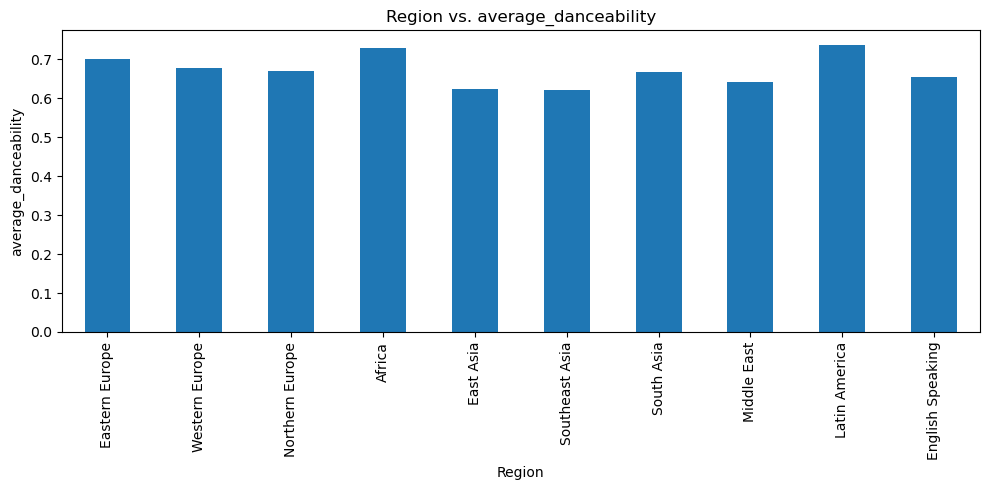

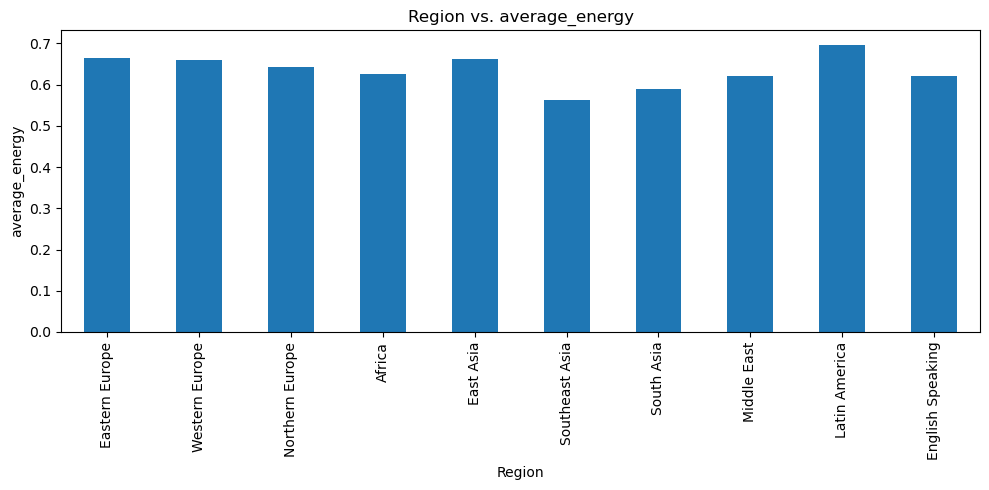

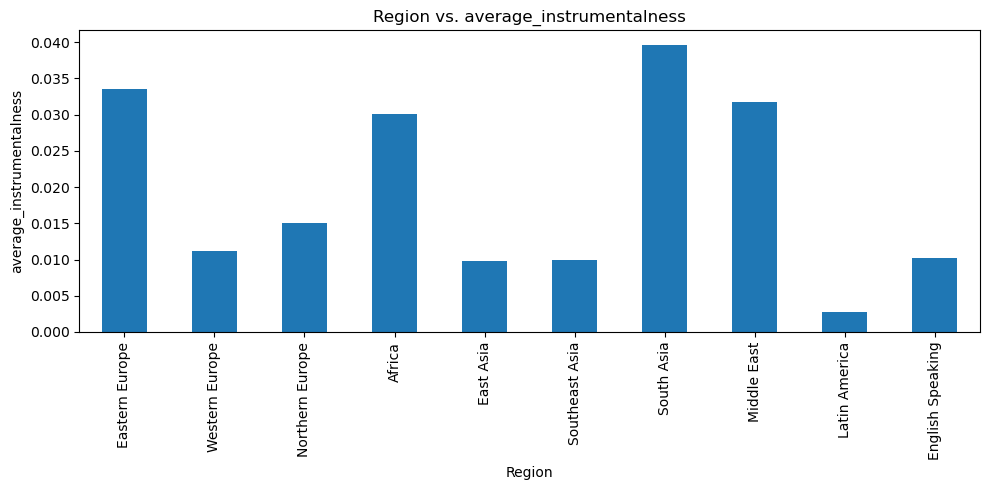

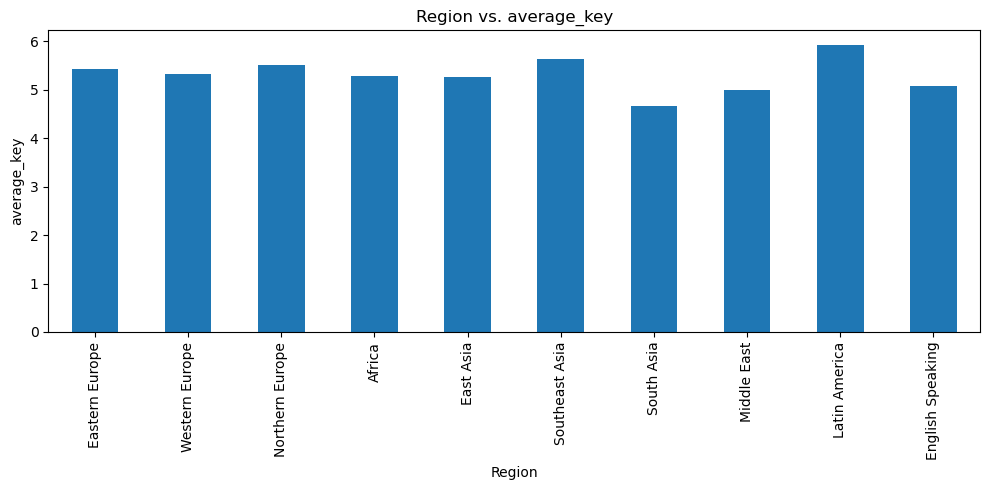

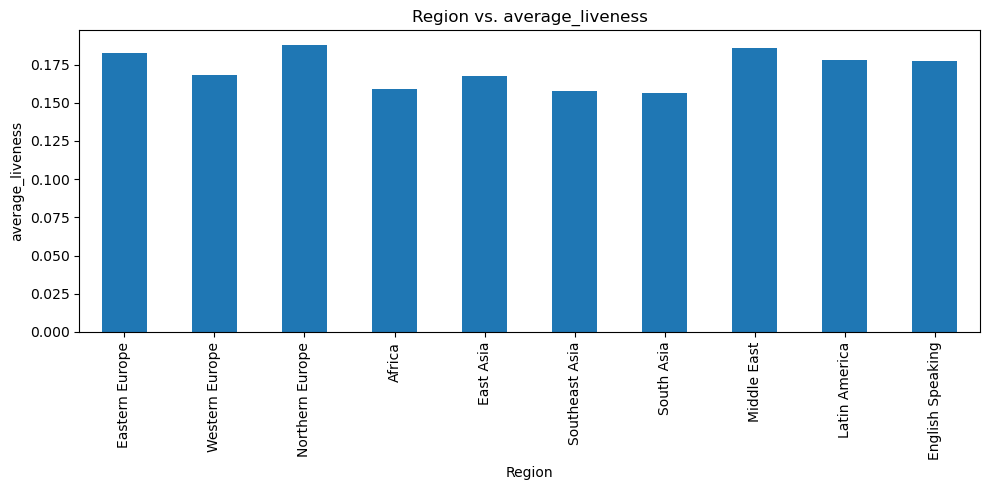

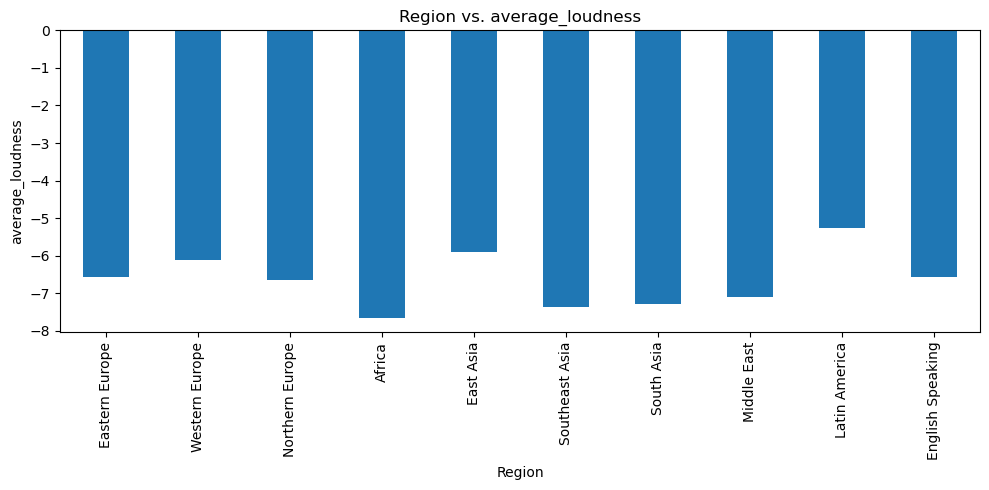

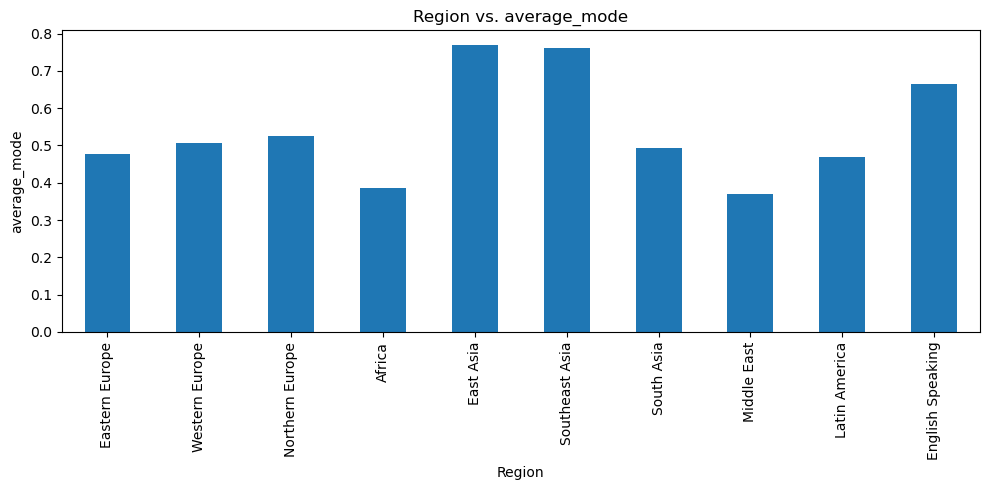

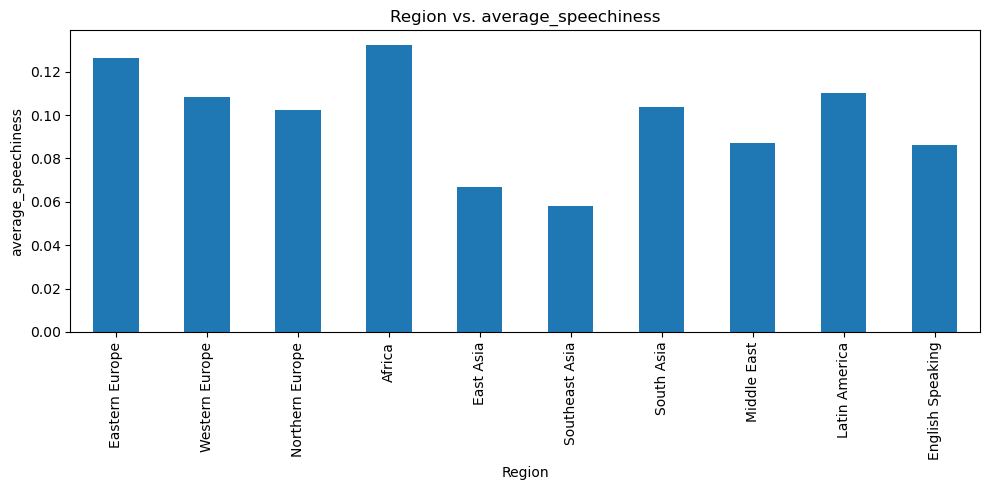

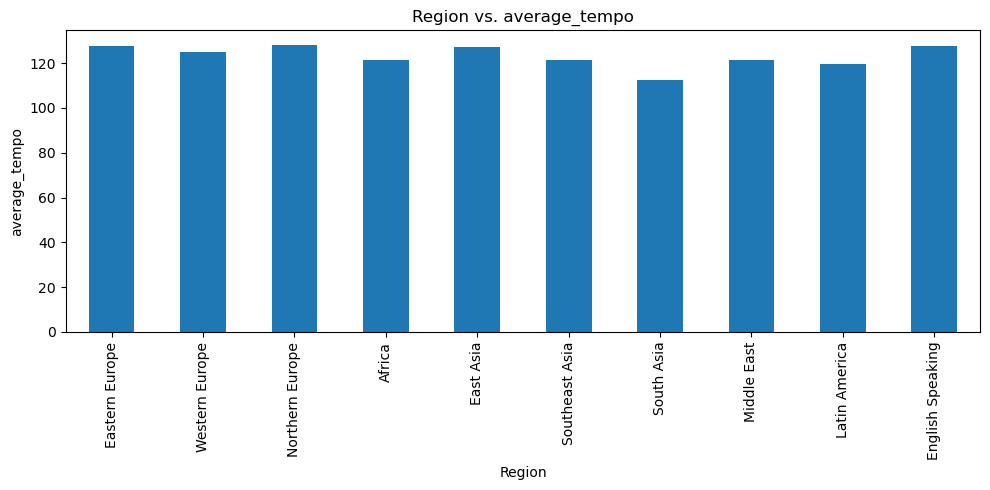

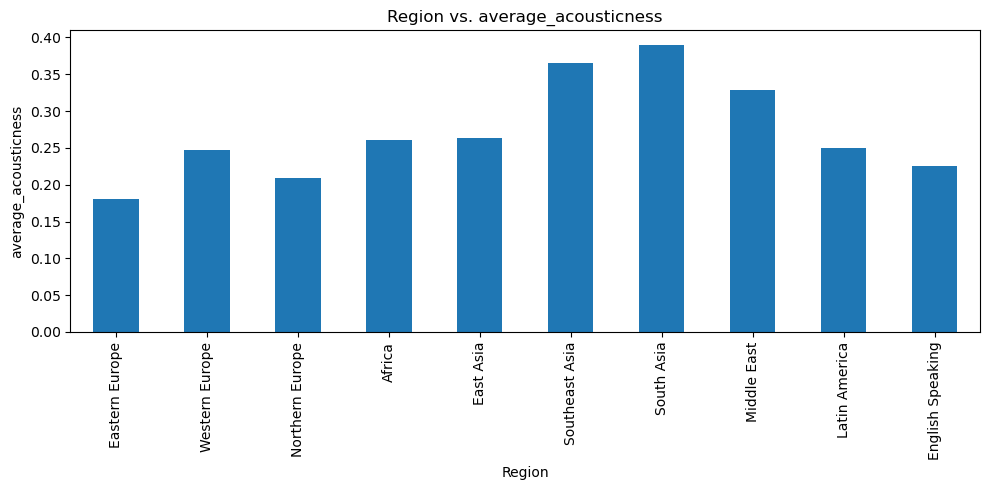

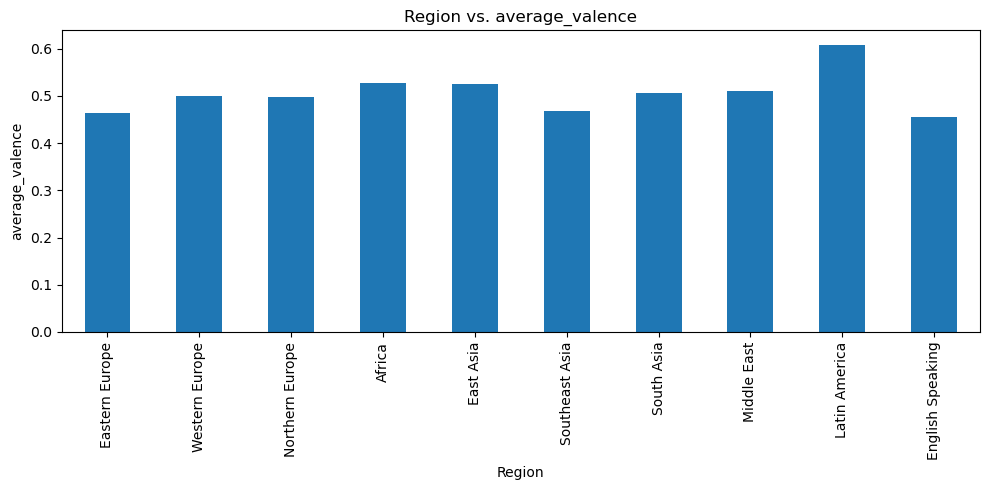

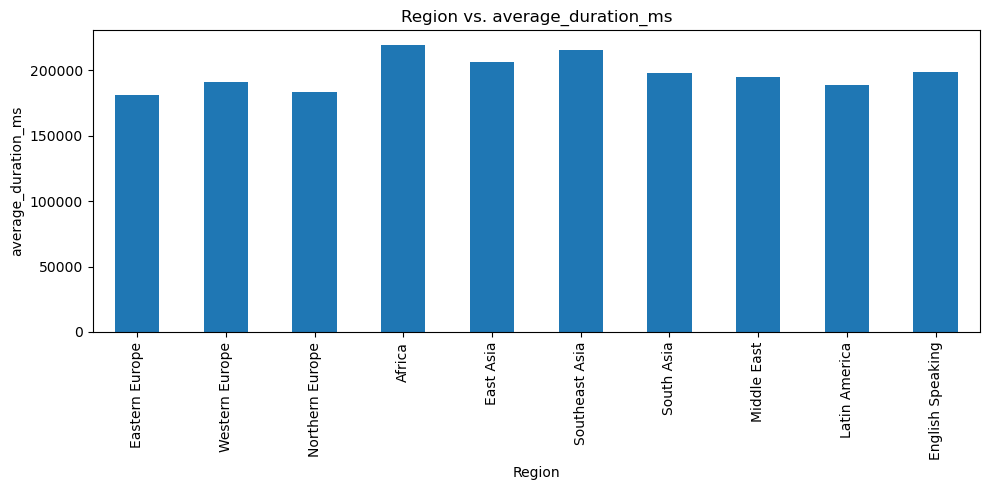

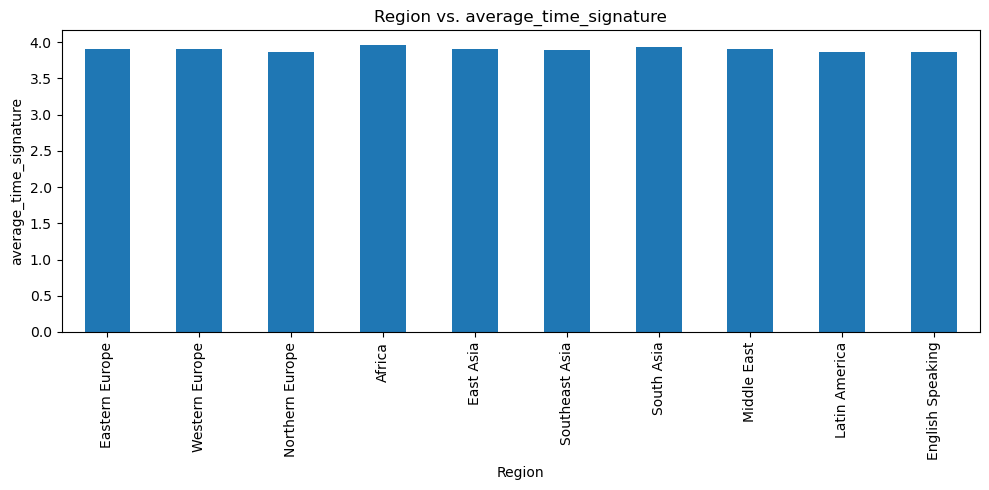

In [20]:
#Graph the world regional averages against one another

for column in regional_averages_df.columns:
    ax = regional_averages_df[column].plot.bar(figsize=(10,5))
    ax.set_xticks(range(len(regional_averages_df.index)))
    ax.set_xticklabels(regional_averages_df.index, rotation=90)
    plt.xlabel("Region")
    plt.ylabel(column)
    plt.title(f"Region vs. {column}")
    plt.tight_layout()
    plt.show()

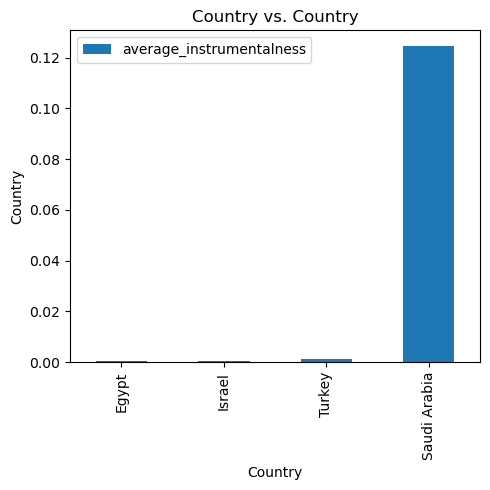

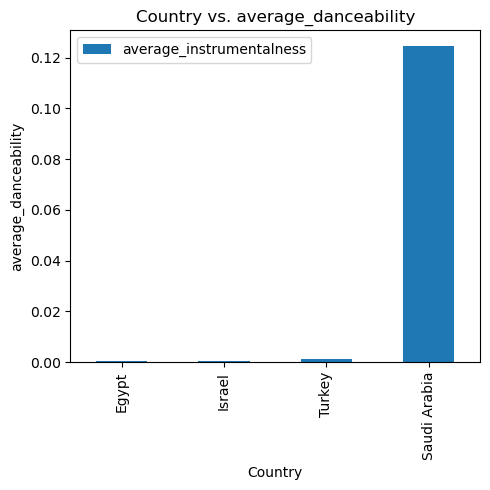

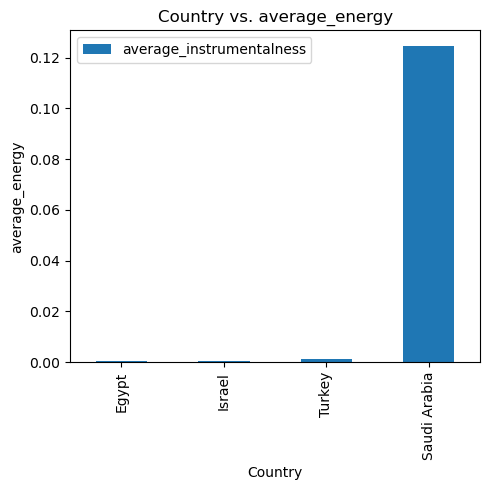

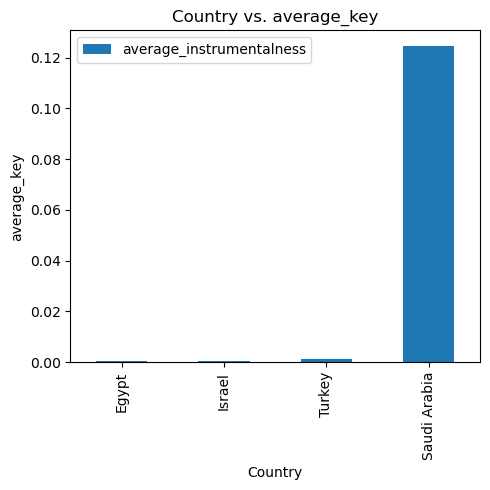

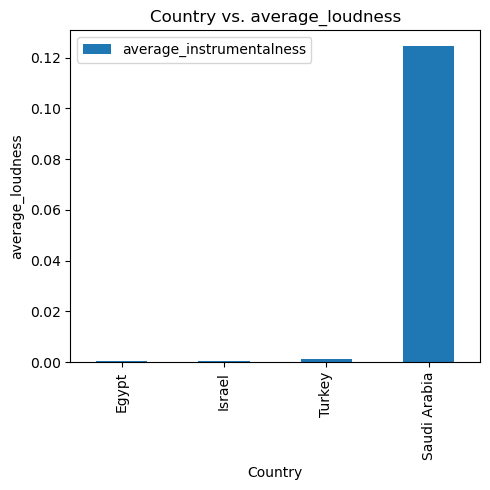

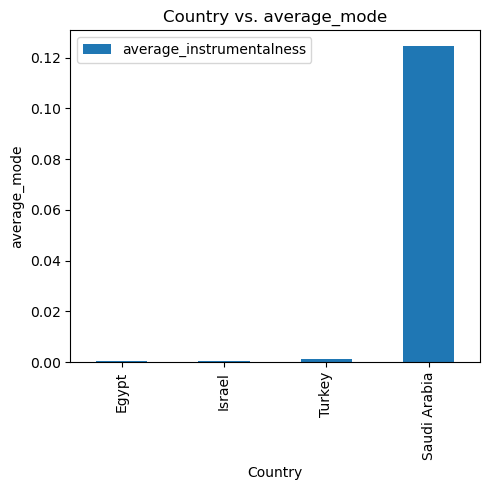

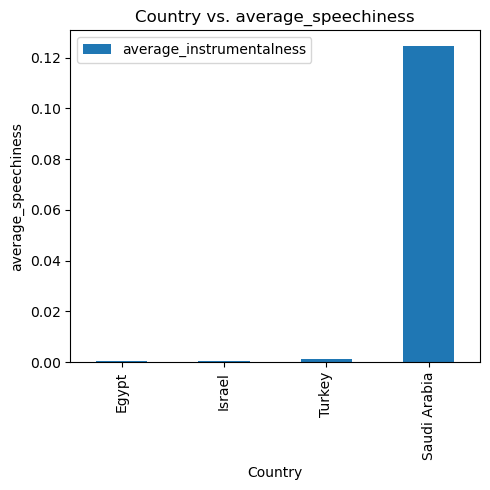

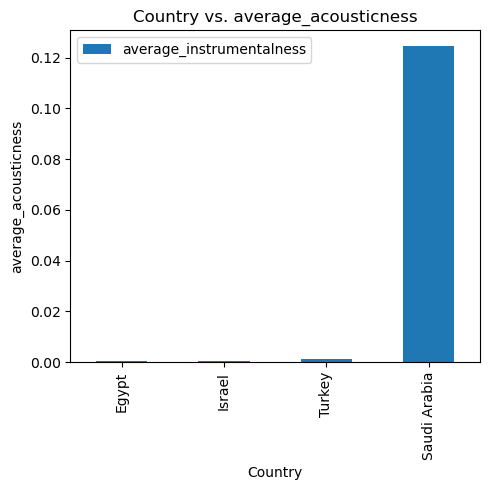

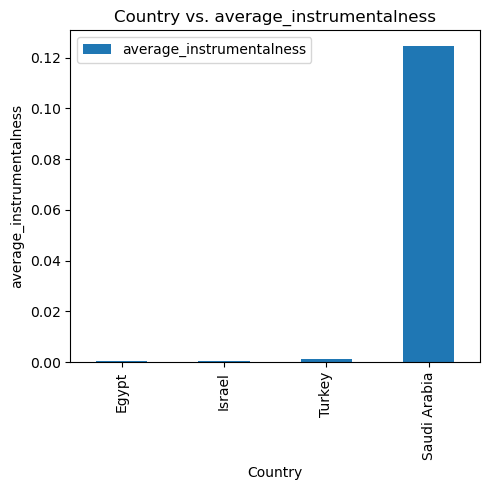

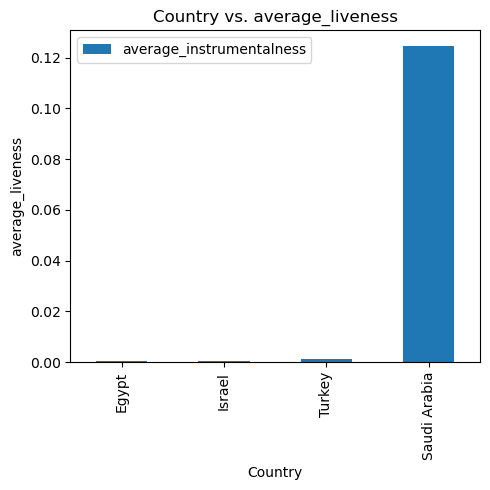

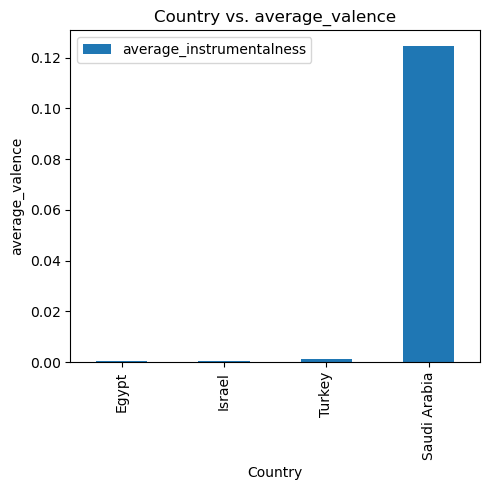

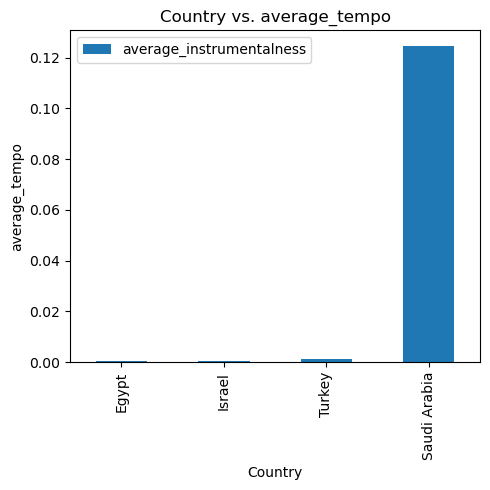

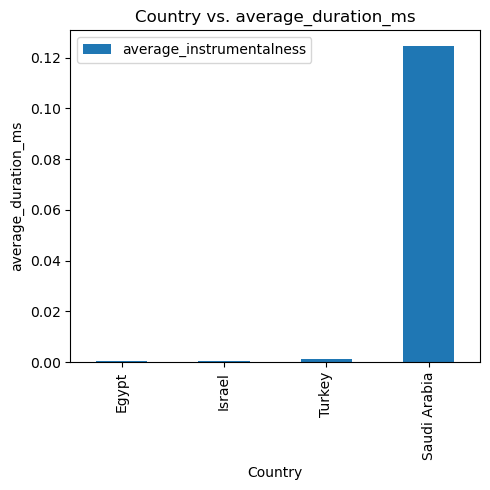

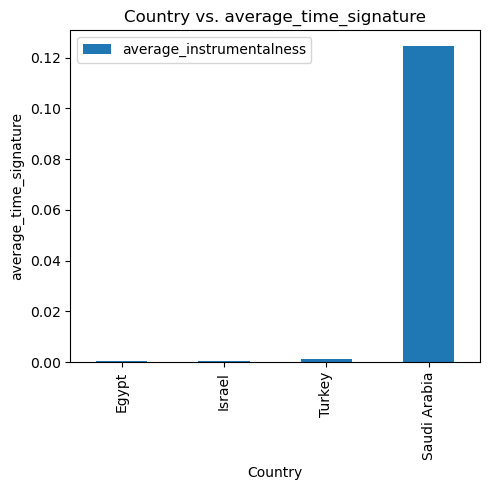

In [24]:
#middle east

for column in middle_eastern_df:
    middle_eastern_df.plot.bar(x='Country', y='average_instrumentalness', figsize=(5,5))
    plt.xlabel('Country')
    plt.ylabel(f'{column}')
    plt.title(f'Country vs. {column}')
    #plt.yticks([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]) #Instrumental
    #plt.yticks([0.1, 0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    plt.tight_layout()
    plt.show()